## Data visualisation

### Objectives:
* Business requirement - 1:<br>"The client is interested in having a capability to differentiate visually 'healthy', 'bleached' and 'dead' corals"

### Inputs:
* inputs/corals-dataset/Dataset/test
* inputs/corals-dataset/Dataset/train
* inputs/corals-dataset/Dataset/validation


### Outputs:
# !!!Cell to be revised!!!
* Image shape embeddings pickle file.
* Mean and variability of images per label plot.
* Plot to distinguish the contrast between parasite-contained and uninfected cell images.
* Generate code that answers business requirement 1 and can be used to build an image montage on the Streamlit dashboard.

---

## Set data directory

#### Importing libraries

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

#### Set working directory

In [2]:
cwd= os.getcwd()
os.chdir('/workspace/corals_health')
print("You new current directory is set")
work_dir = os.getcwd()
work_dir

You new current directory is set


'/workspace/corals_health'

#### Define pathes for 'test', 'train' and 'validation' data folders 

In [12]:
my_data_dir = 'inputs/corals-dataset/Dataset'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'
print(train_path)
print(val_path)
print(test_path)

inputs/corals-dataset/Dataset/train
inputs/corals-dataset/Dataset/validation
inputs/corals-dataset/Dataset/test


### Set output directory

In [4]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

##### Set lable names

In [13]:
print(train_path)
labels = os.listdir(train_path)
print('Label for the images are', labels)

inputs/corals-dataset/Dataset/train
Label for the images are ['Bleached', 'Dead', 'Healthy']


### Visualisation of image data

##### Average image size in the 'train' set

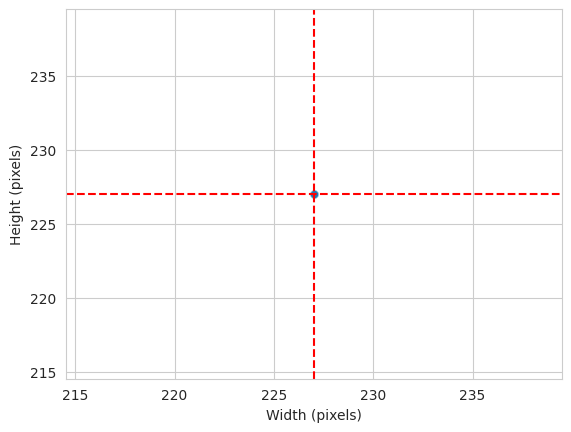

Width average: 227 
Height average: 227
You have 2 graiscale images in your train dataset


In [24]:
dim1, dim2 = [], []
grayscales = 0
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        if len(img.shape) == 3:
            d1, d2, colors = img.shape
        elif len(img.shape) == 2: # The image is graiscale
            d1, d2 = img.shape
            grayscales += 1            
            colors = 1
        else:
            raise ValueError('Unexpected image shape!')
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")
print(f"You have {grayscales} graiscale images in your train dataset")